# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import torch
import random

seed = 1337
random.seed(1337)
np.random.seed(1337)
torch.manual_seed(1337)
torch.backends.cudnn.deterministic = True

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='Reacher.app',seed=seed)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  4.81451988e+00 -1.00000000e+00
  6.38908386e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
  8.53890657e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
# env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
# states = env_info.vector_observations                  # get the current state (for each agent)
# scores = np.zeros(num_agents)                          # initialize the score (for each agent)
# while True:
#     actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
#     actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
#     env_info = env.step(actions)[brain_name]           # send all actions to tne environment
#     next_states = env_info.vector_observations         # get next state (for each agent)
#     rewards = env_info.rewards                         # get reward (for each agent)
#     dones = env_info.local_done                        # see if episode finished
#     scores += env_info.rewards                         # update the score (for each agent)
#     states = next_states                               # roll over states to next time step
#     if np.any(dones):                                  # exit loop if episode finished
#         break
# print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

When finished, you can close the environment.

In [6]:
# env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [8]:
from ppo import run_ppo

run_ppo(env)

update 1/976. Last update in 0.0007050037384033203s
last 100 returns: 0.0
update 2/976. Last update in 6.449515104293823s
last 100 returns: 0.0
update 3/976. Last update in 5.657340049743652s
last 100 returns: 0.06999999843537807
update 4/976. Last update in 5.9648120403289795s
last 100 returns: 0.1099999975413084
update 5/976. Last update in 5.681517124176025s
last 100 returns: 0.10909090665253726
update 6/976. Last update in 5.90643310546875s
last 100 returns: 0.09230769024445461
update 7/976. Last update in 6.254447937011719s
last 100 returns: 0.08999999798834324
update 8/976. Last update in 5.883110046386719s
last 100 returns: 0.129411761813304
update 9/976. Last update in 5.942403078079224s
last 100 returns: 0.11578947109611411
update 10/976. Last update in 5.9591591358184814s
last 100 returns: 0.10476190242029372
update 11/976. Last update in 5.999096632003784s
last 100 returns: 0.16043477902269881
update 12/976. Last update in 5.86052393913269s
last 100 returns: 0.19079999573528

last 100 returns: 3.8777999133244156
update 98/976. Last update in 5.808409929275513s
last 100 returns: 3.9655999113619327
update 99/976. Last update in 6.995630979537964s
last 100 returns: 4.02149991011247
update 100/976. Last update in 5.690313100814819s
last 100 returns: 4.065199909135699
update 101/976. Last update in 5.702042818069458s
last 100 returns: 4.075399908907712
update 102/976. Last update in 5.645758867263794s
last 100 returns: 4.098399908393621
update 103/976. Last update in 5.550951719284058s
last 100 returns: 4.137499907519668
update 104/976. Last update in 5.76893162727356s
last 100 returns: 4.167699906844645
update 105/976. Last update in 5.603495836257935s
last 100 returns: 4.188599906377494
update 106/976. Last update in 5.661635160446167s
last 100 returns: 4.2136999058164655
update 107/976. Last update in 5.580061912536621s
last 100 returns: 4.245899905096739
update 108/976. Last update in 5.598697185516357s
last 100 returns: 4.296699903961271
update 109/976. Las

last 100 returns: 5.4350998785160485
update 194/976. Last update in 5.6433680057525635s
last 100 returns: 5.4350998785160485
update 195/976. Last update in 5.578965902328491s
last 100 returns: 5.51159987680614
update 196/976. Last update in 5.178239822387695s
last 100 returns: 5.506699876915664
update 197/976. Last update in 5.311944961547852s
last 100 returns: 5.537599876224995
update 198/976. Last update in 5.5635762214660645s
last 100 returns: 5.514199876748026
update 199/976. Last update in 5.579422235488892s
last 100 returns: 5.630199874155223
update 200/976. Last update in 5.608043909072876s
last 100 returns: 5.636399874016643
update 201/976. Last update in 5.565051794052124s
last 100 returns: 5.639099873956293
update 202/976. Last update in 5.294299125671387s
last 100 returns: 5.65809987353161
update 203/976. Last update in 5.554250001907349s
last 100 returns: 5.663199873417616
update 204/976. Last update in 5.6457319259643555s
last 100 returns: 5.728899871949107
update 205/976.

last 100 returns: 6.443599855974316
update 290/976. Last update in 5.574349641799927s
last 100 returns: 6.487099855002016
update 291/976. Last update in 5.679594993591309s
last 100 returns: 6.489299854952842
update 292/976. Last update in 5.569669008255005s
last 100 returns: 6.403899856861681
update 293/976. Last update in 5.557770729064941s
last 100 returns: 6.487199854999781
update 294/976. Last update in 5.5499420166015625s
last 100 returns: 6.538899853844196
update 295/976. Last update in 5.597549676895142s
last 100 returns: 6.519599854275584
update 296/976. Last update in 5.5844738483428955s
last 100 returns: 6.49629985479638
update 297/976. Last update in 5.592603921890259s
last 100 returns: 6.460899855587631
update 298/976. Last update in 5.589059829711914s
last 100 returns: 6.488599854968488
update 299/976. Last update in 5.557870864868164s
last 100 returns: 6.458099855650216
update 300/976. Last update in 5.565915107727051s
last 100 returns: 6.472699855323881
update 301/976. L

last 100 returns: 6.739599849358201
update 386/976. Last update in 5.606201887130737s
last 100 returns: 6.804499847907573
update 387/976. Last update in 5.588066816329956s
last 100 returns: 6.828299847375601
update 388/976. Last update in 5.554258823394775s
last 100 returns: 6.85499984677881
update 389/976. Last update in 5.487430810928345s
last 100 returns: 6.824799847453833
update 390/976. Last update in 5.558609247207642s
last 100 returns: 6.782599848397076
update 391/976. Last update in 5.565528154373169s
last 100 returns: 6.844399847015739
update 392/976. Last update in 5.557989120483398s
last 100 returns: 6.776399848535657
update 393/976. Last update in 5.557719707489014s
last 100 returns: 6.798599848039448
update 394/976. Last update in 5.588089942932129s
last 100 returns: 6.768399848714471
update 395/976. Last update in 5.585076093673706s
last 100 returns: 6.794399848133326
update 396/976. Last update in 5.5858330726623535s
last 100 returns: 6.807399847842753
update 397/976. La

last 100 returns: 6.609799852259457
update 482/976. Last update in 5.600617170333862s
last 100 returns: 6.555899853464216
update 483/976. Last update in 5.5601019859313965s
last 100 returns: 6.5946998525969684
update 484/976. Last update in 5.562175989151001s
last 100 returns: 6.517999854311347
update 485/976. Last update in 5.588922739028931s
last 100 returns: 6.501099854689091
update 486/976. Last update in 5.368215084075928s
last 100 returns: 6.523099854197353
update 487/976. Last update in 5.60619330406189s
last 100 returns: 6.531199854016304
update 488/976. Last update in 5.587486982345581s
last 100 returns: 6.6365998516604305
update 489/976. Last update in 5.579977989196777s
last 100 returns: 6.658599851168692
update 490/976. Last update in 5.596140146255493s
last 100 returns: 6.726199849657714
update 491/976. Last update in 5.574496030807495s
last 100 returns: 6.689799850471318
update 492/976. Last update in 5.596980094909668s
last 100 returns: 6.7030998501740395
update 493/976.

last 100 returns: 6.736099849436432
update 578/976. Last update in 5.5712080001831055s
last 100 returns: 6.6584998511709275
update 579/976. Last update in 5.66084098815918s
last 100 returns: 6.6879998505115505
update 580/976. Last update in 5.565443277359009s
last 100 returns: 6.628899851832539
update 581/976. Last update in 5.5623462200164795s
last 100 returns: 6.579099852945656
update 582/976. Last update in 5.587540864944458s
last 100 returns: 6.536599853895605
update 583/976. Last update in 5.56624174118042s
last 100 returns: 6.55389985350892
update 584/976. Last update in 5.578134775161743s
last 100 returns: 6.498799854740501
update 585/976. Last update in 5.57131814956665s
last 100 returns: 6.548899853620679
update 586/976. Last update in 5.571360111236572s
last 100 returns: 6.491999854892493
update 587/976. Last update in 5.562307834625244s
last 100 returns: 6.444899855945259
update 588/976. Last update in 5.542759895324707s
last 100 returns: 6.3978998569957914
update 589/976. L

last 100 returns: 6.107199863493443
update 674/976. Last update in 5.562405109405518s
last 100 returns: 6.075199864208698
update 675/976. Last update in 5.571577072143555s
last 100 returns: 5.969599866569042
update 676/976. Last update in 5.579141855239868s
last 100 returns: 5.957899866830558
update 677/976. Last update in 5.565860986709595s
last 100 returns: 5.961299866754562
update 678/976. Last update in 5.580798149108887s
last 100 returns: 5.9500998670049015
update 679/976. Last update in 5.5840699672698975s
last 100 returns: 6.000299865882844
update 680/976. Last update in 5.557595729827881s
last 100 returns: 5.894399868249893
update 681/976. Last update in 5.570515871047974s
last 100 returns: 5.760399871245027
update 682/976. Last update in 5.591023206710815s
last 100 returns: 5.750699871461839
update 683/976. Last update in 5.570507764816284s
last 100 returns: 5.734199871830643
update 684/976. Last update in 5.572783708572388s
last 100 returns: 5.748999871499836
update 685/976. 

last 100 returns: 6.4527998557686805
update 770/976. Last update in 5.528933048248291s
last 100 returns: 6.373699857536703
update 771/976. Last update in 5.589656114578247s
last 100 returns: 6.374899857509881
update 772/976. Last update in 5.579096078872681s
last 100 returns: 6.358699857871979
update 773/976. Last update in 5.56122088432312s
last 100 returns: 6.306399859040976
update 774/976. Last update in 5.581002950668335s
last 100 returns: 6.27539985973388
update 775/976. Last update in 5.577401876449585s
last 100 returns: 6.267899859901518
update 776/976. Last update in 5.579150915145874s
last 100 returns: 6.314599858857691
update 777/976. Last update in 5.562794923782349s
last 100 returns: 6.341599858254194
update 778/976. Last update in 5.528507947921753s
last 100 returns: 6.348899858091027
update 779/976. Last update in 5.471160173416138s
last 100 returns: 6.38729985723272
update 780/976. Last update in 5.572656869888306s
last 100 returns: 6.3745998575165865
update 781/976. Las

last 100 returns: 5.96809986660257
update 866/976. Last update in 5.479296922683716s
last 100 returns: 5.958099866826087
update 867/976. Last update in 5.559697866439819s
last 100 returns: 5.9589998668059705
update 868/976. Last update in 5.4743571281433105s
last 100 returns: 5.915199867784977
update 869/976. Last update in 5.572561740875244s
last 100 returns: 5.866899868864566
update 870/976. Last update in 5.5814127922058105s
last 100 returns: 5.854699869137257
update 871/976. Last update in 5.580695867538452s
last 100 returns: 5.817799869962037
update 872/976. Last update in 5.474870920181274s
last 100 returns: 5.872299868743867
update 873/976. Last update in 5.495864152908325s
last 100 returns: 5.846999869309366
update 874/976. Last update in 5.585122108459473s
last 100 returns: 5.932999867387116
update 875/976. Last update in 5.548869848251343s
last 100 returns: 5.961399866752327
update 876/976. Last update in 5.545604944229126s
last 100 returns: 5.924299867581576
update 877/976. 

last 100 returns: 6.170799862071871
update 962/976. Last update in 5.57935094833374s
last 100 returns: 6.206899861264974
update 963/976. Last update in 5.4865100383758545s
last 100 returns: 6.277599859684706
update 964/976. Last update in 5.564423084259033s
last 100 returns: 6.28389985954389
update 965/976. Last update in 5.506086826324463s
last 100 returns: 6.3011998591572045
update 966/976. Last update in 5.554616928100586s
last 100 returns: 6.326499858591705
update 967/976. Last update in 5.55914306640625s
last 100 returns: 6.3539998579770325
update 968/976. Last update in 5.607385873794556s
last 100 returns: 6.352299858015031
update 969/976. Last update in 5.612753868103027s
last 100 returns: 6.411399856694043
update 970/976. Last update in 5.583055019378662s
last 100 returns: 6.39829985698685
update 971/976. Last update in 5.562642812728882s
last 100 returns: 6.408499856758863
update 972/976. Last update in 5.576874017715454s
last 100 returns: 6.401099856924265
update 973/976. Las

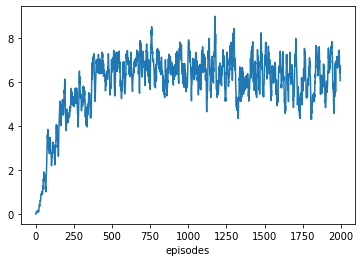

In [19]:
import pickle
import matplotlib.pyplot as plt
from collections import deque

datestamp = '230303'
with open(f'checkpoints/{datestamp}/eplen_and_returns_976.pickle', 'rb') as f:
    _, total_rewards = zip(*pickle.load(f))
    
smoothed = []
queue = deque([], maxlen=10)
for r in total_rewards:
    queue.append(r)
    smoothed.append(sum(queue)/len(queue))
fig,ax = plt.subplots()
ax.plot(smoothed)
ax.set_xlabel('episodes')
plt.savefig(f'checkpoints/{datestamp}/learning_curve.png')
plt.show()

In [10]:
a = np.array([1,2,3])
a = np.expand_dims(a, axis=0)
print(a.shape)

(1, 3)


In [11]:
# from ddpg_agent import Agent

# agent = Agent(state_size=33, action_size=4, random_seed=2)
# scores = agent.run_unity_ddpg(env)
# env.close()

# fig = plt.figure()
# ax = fig.add_subplot(111)
# plt.plot(np.arange(1, len(scores)+1), scores)
# plt.ylabel('Score')
# plt.xlabel('Episode #')
# plt.show()